# 3. Plotting for Exploratory data analysis (EDA)

## Haberman Survival Dataset

Haberman Survival Dataset:https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical),
Patient's year of operation (year - 1900, numerical),
Number of positive axillary nodes detected (numerical),

Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman a pandas dataFrame.
hbrmn = pd.read_csv("haberman.csv")
print(hbrmn)


     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [ ]:
# (Q) how many data-points and features?
print (hbrmn.shape)

(306, 4)


In [ ]:
#(Q) What are the column names in our dataset?
print (hbrmn.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#(Q) How many data points for each class are present? 
#(or) How many patients for each status are present?

hbrmn["status"].value_counts()
# balanced-dataset vs imbalanced datasets


1    225
2     81
Name: status, dtype: int64

Observation: #Haberman is a imbalanced dataset as the number of data points for both status vary with large margine

# (3.2) 2-D Scatter Plot

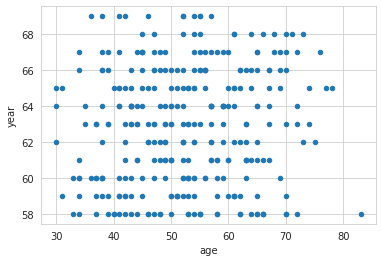

In [ ]:
#2-D scatter plot:


hbrmn.plot(kind='scatter', x='age', y='year') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label.

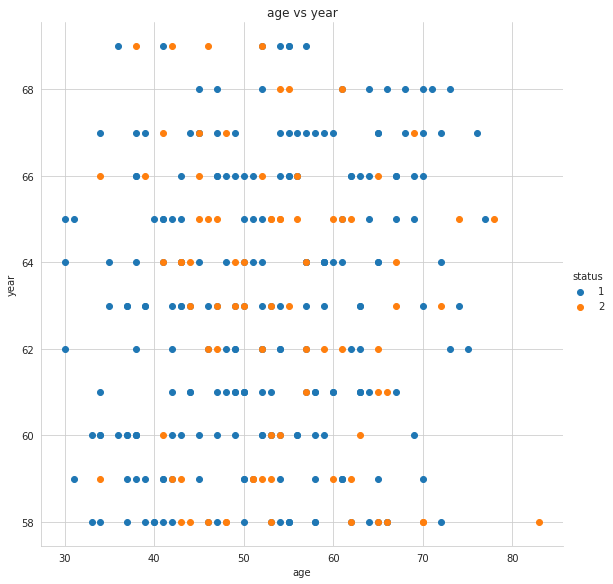

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(hbrmn, hue="status", height=8) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("age vs year")   
plt.show();



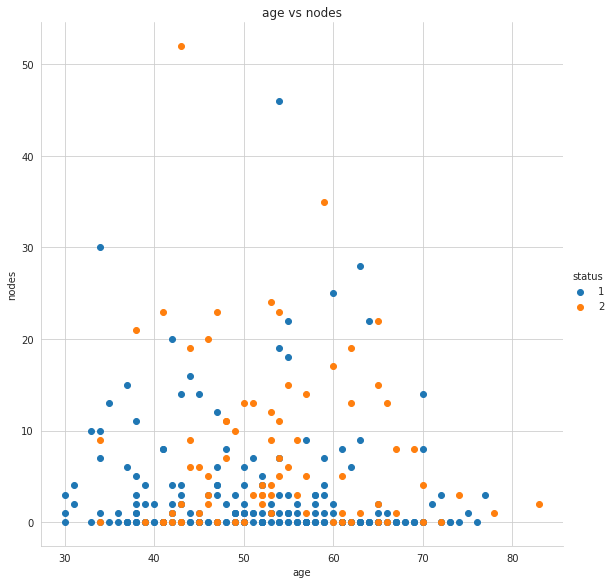

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(hbrmn, hue="status", height=8) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("age vs nodes")   
plt.show();

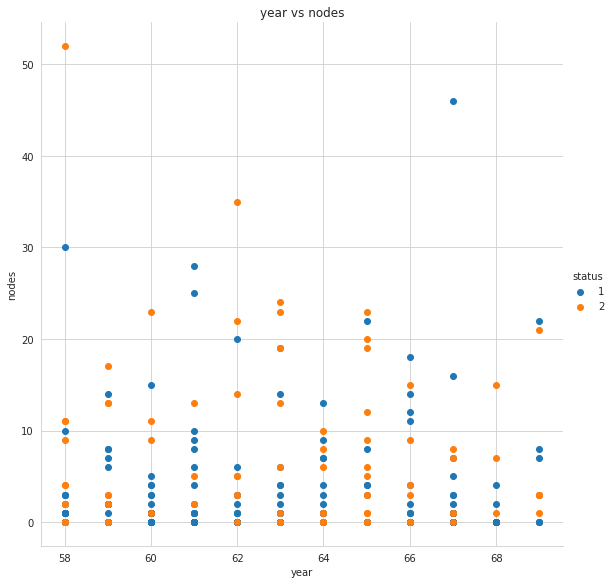

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(hbrmn, hue="status", height=8) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("year vs nodes")   
plt.show();

**Observations:**
1. Above three  plots are clearly not providing an accurate classification to analyse.
2. Age vs Nodes is making some groups but with overlapping 
3. So far we can see in terms of analysis (age vs nodes) > (year vs nodes) > (age vs year)

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

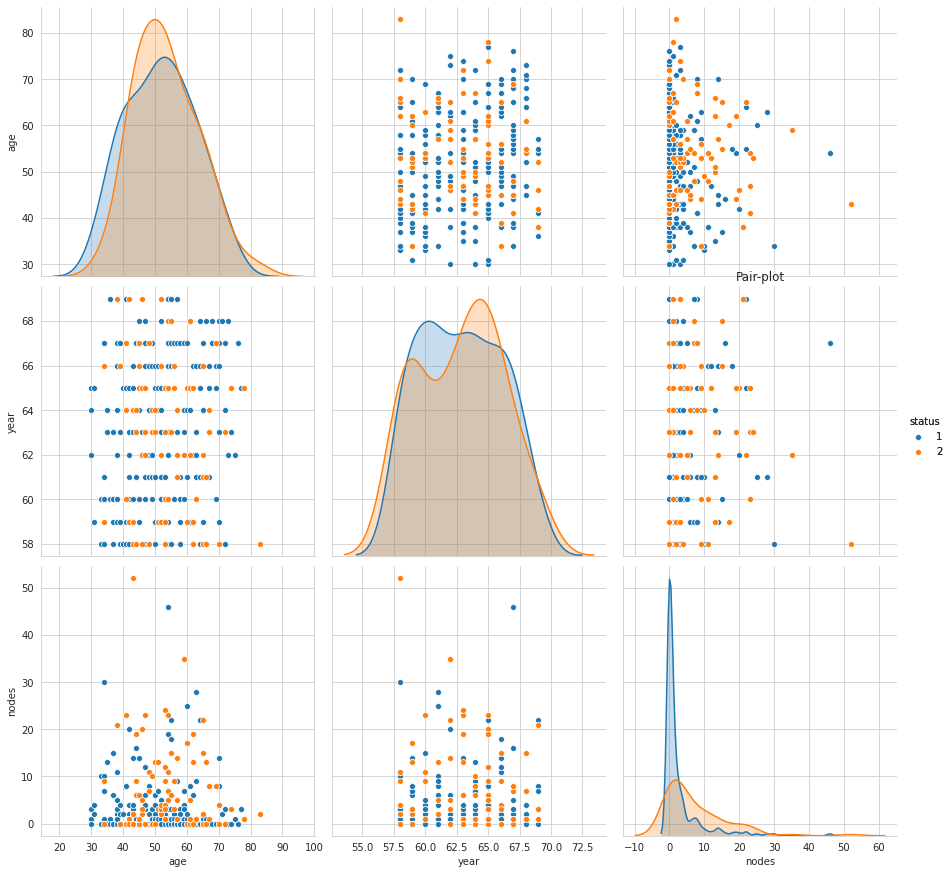

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbrmn, hue="status", height=4)\
.add_legend()
plt.title("Pair-plot")
plt.show()


**Observations**:
1. (year vs year) and (age vs age) both are highly overlapping
2. (node vs node ) is minimal overlapping can be used for building simple model with some error %.



# (3.4) Histogram, PDF, CDF

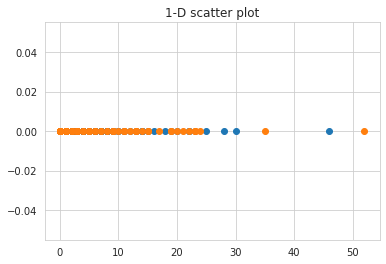

In [ ]:

#1-D scatter plot 
import numpy as np
hbrmn_survived = hbrmn.loc[hbrmn["status"] == 1];
hbrmn_died = hbrmn.loc[hbrmn["status"] == 2];


plt.plot(hbrmn_survived["nodes"], np.zeros_like(hbrmn_survived['nodes']), 'o')
plt.plot(hbrmn_died["nodes"], np.zeros_like(hbrmn_died['nodes']), 'o')
plt.title("1-D scatter plot")
plt.show()


**Observation:**


*   This plot is highly overlapping and hard to extract anything




In [ ]:
hbrmn['status'] = hbrmn.status.map({1:'survived ',2:'died'})  #for better understading
print(hbrmn)

     age  year  nodes     status
0     30    64      1  survived 
1     30    62      3  survived 
2     30    65      0  survived 
3     31    59      2  survived 
4     31    65      4  survived 
..   ...   ...    ...        ...
301   75    62      1  survived 
302   76    67      0  survived 
303   77    65      3  survived 
304   78    65      1       died
305   83    58      2       died

[306 rows x 4 columns]


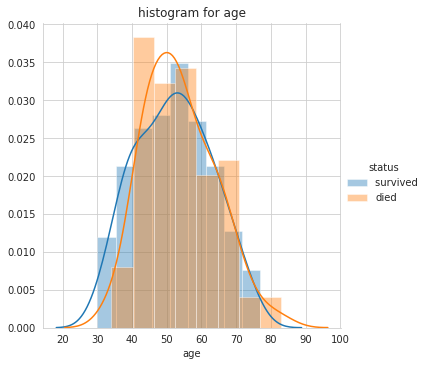

In [ ]:
sns.FacetGrid(hbrmn, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("histogram for age")   
plt.show();



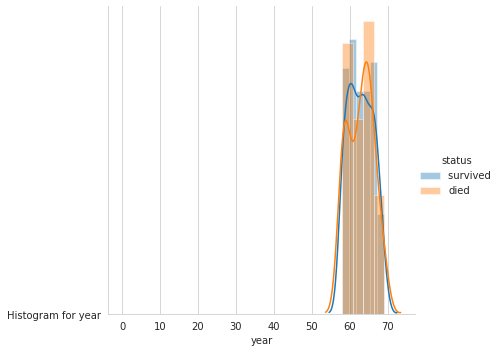

In [ ]:
sns.FacetGrid(hbrmn, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.plot("Histogram for year")   
plt.show();

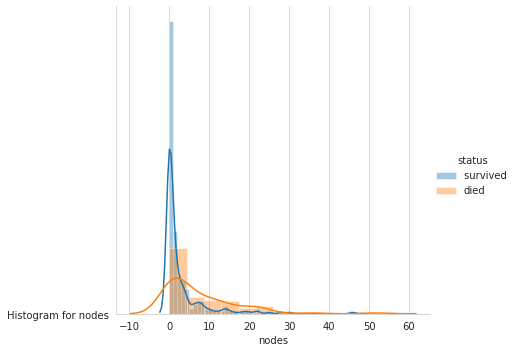

In [ ]:
sns.FacetGrid(hbrmn, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.plot("Histogram for nodes")   
plt.show();

**Observation:**

*   Plots for Age and year are highly overlapping and less details to extract anything
*   Plot for nodes is slightly better than age and year wise.

*   We can clearly see if node value between -5 and +5 have better chance at survival
*   Node value above 30 shows most prominant death numbers





In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# Gaussian/Normal distribution.
# One of the most frequent distributions in nature.


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


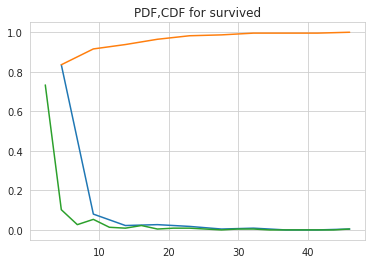

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# How to construct a CDF?
# How to read a CDF?


counts, bin_edges = np.histogram(hbrmn_survived ['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(hbrmn_survived ['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("PDF,CDF for survived")
plt.show();


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


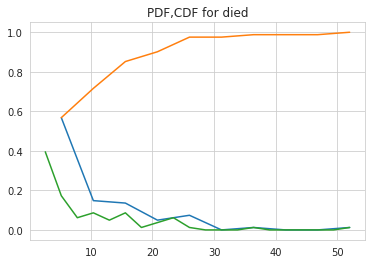

In [ ]:
counts, bin_edges = np.histogram(hbrmn_died ['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(hbrmn_died  ['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("PDF,CDF for died")
plt.show();


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


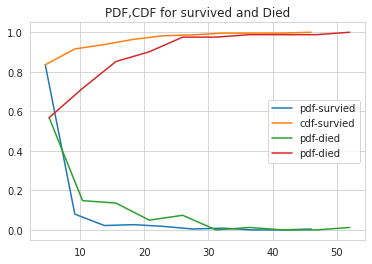

In [ ]:
# Plots of CDF for both fetures



counts, bin_edges = np.histogram(hbrmn_survived ['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf-survied')
plt.plot(bin_edges[1:], cdf,label='cdf-survied')



counts, bin_edges = np.histogram(hbrmn_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf-died')
plt.plot(bin_edges[1:], cdf,label='pdf-died')
plt.title("PDF,CDF for survived and Died")
plt.legend()
plt.show();

**Observation:**


1.   Using CDF we can see that if node value is 5, Higher chance(82%)patient is of 1st class and (58 %) chance of 2nd class.




# (3.5) Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(hbrmn_survived ["nodes"]))
print(np.mean(hbrmn_died ["nodes"]))

#Mean with an outlier.
print("\nMean with an outlier:")
print(np.mean(np.append(hbrmn_survived["nodes"],100)));
print(np.mean(np.append(hbrmn_died["nodes"],100)));

print("\nStd-dev:");
print(np.std(hbrmn_survived["nodes"]))
print(np.std(hbrmn_died["nodes"]))






Means:
2.7911111111111113
7.45679012345679

Mean with an outlier:
3.2212389380530975
8.585365853658537

Std-dev:
5.857258449412131
9.128776076761632


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hbrmn_survived["nodes"]))
print(np.median(hbrmn_died["nodes"]))

#Median with an outlier
print("\nMedian with an outlier:")
print(np.median(np.append(hbrmn_survived["nodes"],100)));
print(np.median(np.append(hbrmn_died["nodes"],100)));


print("\nQuantiles:")
print(np.percentile(hbrmn_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(hbrmn_died["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hbrmn_survived["nodes"],90))
print(np.percentile(hbrmn_died["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hbrmn_survived["nodes"]))
print(robust.mad(hbrmn_died["nodes"]))




Medians:
0.0
4.0

Median with an outlier:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# (3.7) Box plot and Whiskers

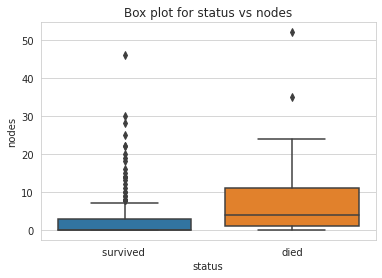

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=hbrmn)
plt.title("Box plot for status vs nodes")
plt.show()

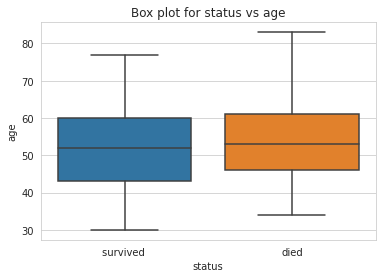

In [ ]:
sns.boxplot(x='status',y='age',data=hbrmn)
plt.title("Box plot for status vs age")
plt.show()

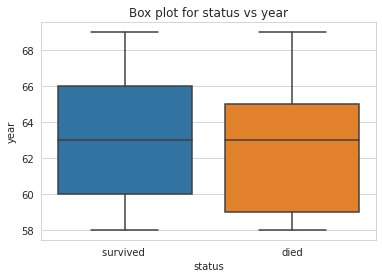

In [ ]:
sns.boxplot(x='status',y='year',data=hbrmn)
plt.title("Box plot for status vs year")
plt.show()

**Observation:**


*   From above three plot we can extract most information from (status vs nodes) plot.
*   We can see for (status vs nodes) nodes > 5, increase in the number of class 2(deaths). where class 1(survivers) remains below.








# (3.8) Violin plots

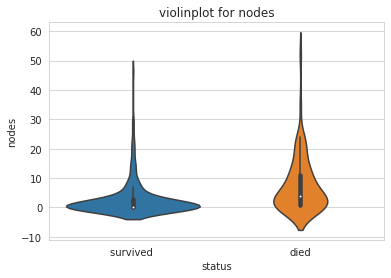

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=hbrmn, size=8)
plt.title("violinplot for nodes")
plt.show()

**Observation:**
At node 0 chance of survival is high

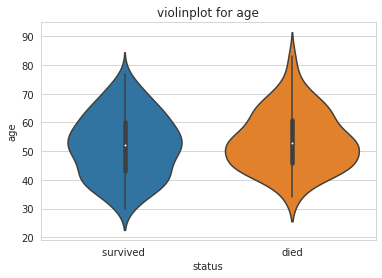

In [ ]:
sns.violinplot(x="status", y="age", data=hbrmn, size=8)
plt.title("violinplot for age")
plt.show()

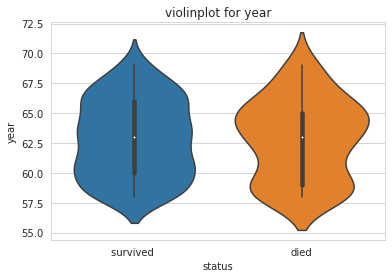

In [ ]:
sns.violinplot(x="status", y="year", data=hbrmn, size=8)
plt.title("violinplot for year")
plt.show()



# (3.10) Univariate, bivariate and multivariate analysis.

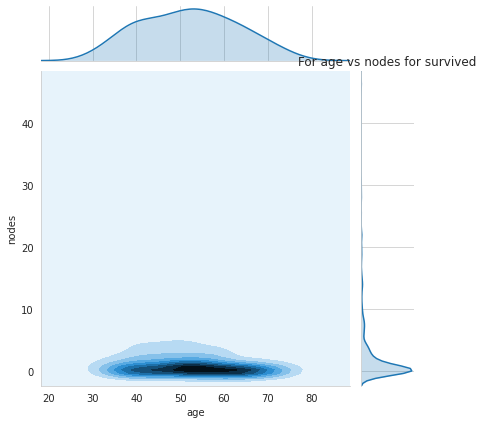

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=hbrmn_survived , kind="kde");
plt.title("For age vs nodes for survived")
plt.show();


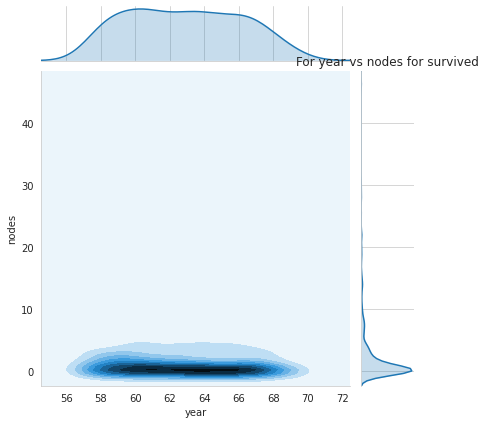

In [ ]:
sns.jointplot(x="year", y="nodes", data=hbrmn_survived , kind="kde");
plt.title("For year vs nodes for survived")
plt.show();

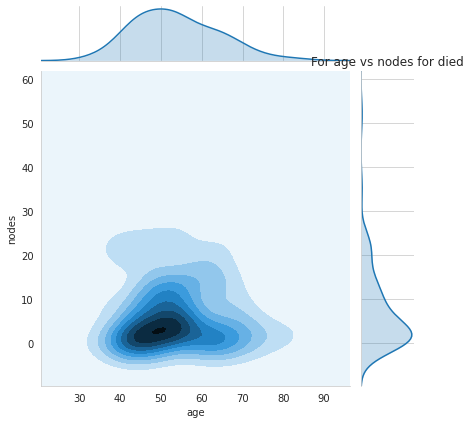

In [ ]:
sns.jointplot(x="age", y="nodes", data=hbrmn_died  , kind="kde");
plt.title("For age vs nodes for died")
plt.show();

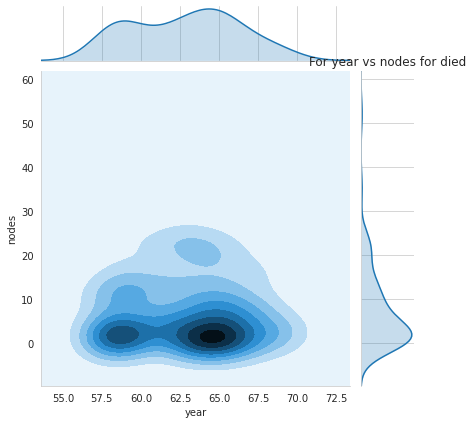

In [ ]:
sns.jointplot(x="year", y="nodes", data=hbrmn_died  , kind="kde");
plt.title("For year vs nodes for died")
plt.show();

# Summarizing plots in english:
* Haberman contains imbalnced data set for with high margin 
1.   class 1 : 225
2.   Class 2: 81

*   Nodes are the most important factor to decide the class of patient than age and year.


* ** However We can analyse following information:**

*   Patient at (node < 5) are most likely of class 1 and (node > 5)are most likely of class 2. ref violine plots , Box plot.

*   Using CDF we can see at node value 5 we can get 82 % class 1 classified. which is great value to support above analysis.

*   From contors-plot we can see depth for survival is high for age group (50-60) and depth for death is high in (45-55).














